In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [232]:
df=pd.read_csv("algerian_dataset.csv")

In [233]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [234]:
df.drop(['day','month','year'],axis=1,inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [235]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [236]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [237]:
df['Classes'].value_counts()

Classes
1    137
0    107
Name: count, dtype: int64

In [238]:
x=df.drop("FWI",axis=1)
y=df["FWI"]

In [239]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [240]:
def correlation(dt,th):
    col_corr=set()
    corr_mat=dt.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
         if abs(corr_mat.iloc[i,j]>th):
            col=corr_mat.columns[i]
            col_corr.add(col)
    return col_corr
r=correlation(x_train,0.9)
print(r)

{'BUI'}


In [241]:
x_train.drop(r,axis=1,inplace=True)
x_test.drop(r,axis=1,inplace=True)

In [242]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_s=scaler.fit_transform(x_train)
x_test_s=scaler.transform(x_test)

<Axes: >

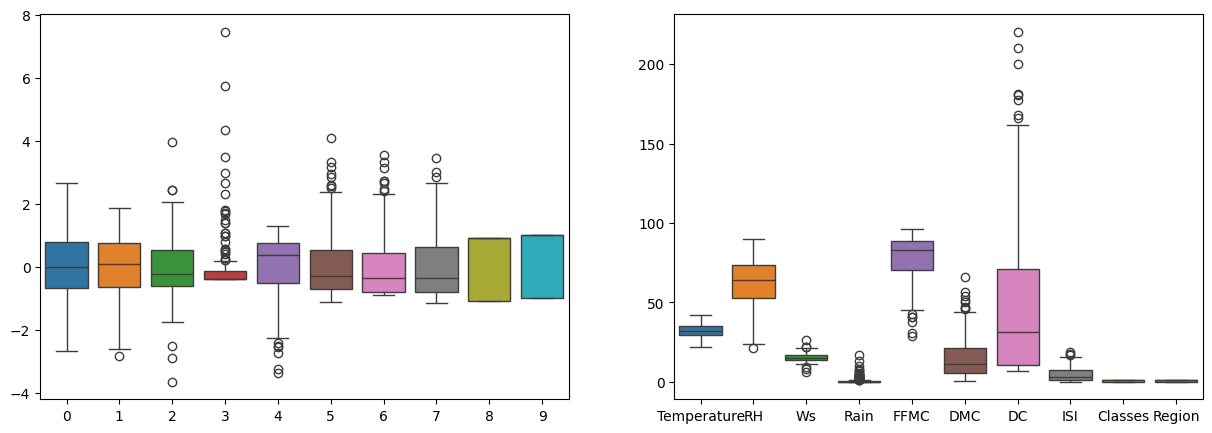

In [243]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train_s)
plt.subplot(1,2,2)
sns.boxplot(data=x_train)

In [244]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(n_jobs=-1)
reg.fit(x_train,y_train)
print(reg.coef_)
print(reg.intercept_)

[-0.01846373 -0.0153135  -0.00585476 -0.00464631 -0.06711232  0.22938178
  0.01760185  1.06825143  1.53569626 -0.46407433]
3.8886300666680143


In [245]:
y_pred=reg.predict(x_test_s)

c:\nihal\python\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


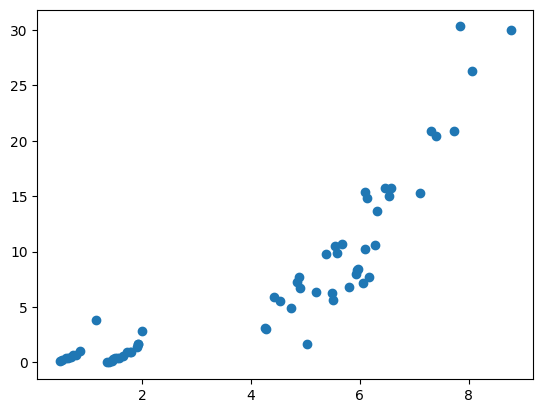

In [246]:
plt.scatter(y_pred,y_test)

2.955200846807391 1.2299910309214532 1.7190697620537077
0.9489830557930277
0.9387796669516332


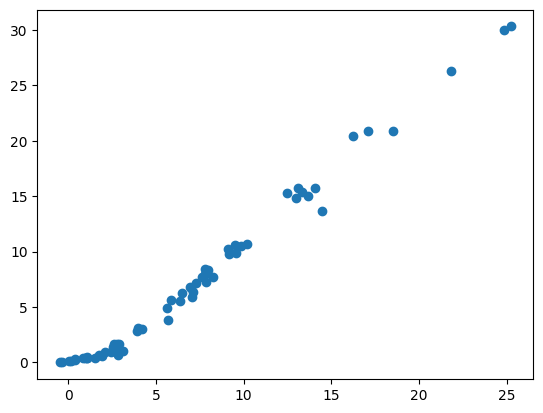

In [247]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
lasso=Lasso()
lasso.fit(x_train_s,y_train)
y_pred=lasso.predict(x_test_s)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print(f"{mse} {mae} {rmse}")
print(score)
arscore=1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(arscore)
plt.scatter(y_pred,y_test)

0.8555644831086964 0.6648951432882101 0.9249672875884295
0.9852300104923907
0.9822760125908688


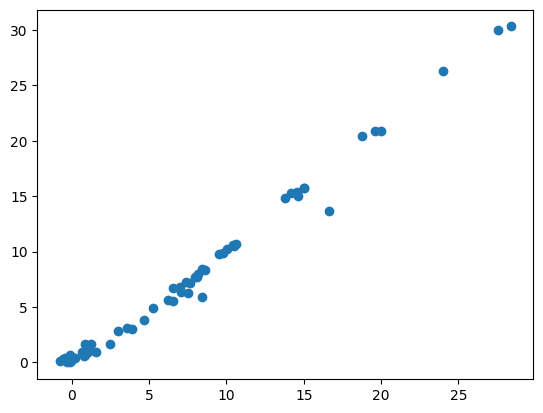

In [248]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
ridge=Ridge()
ridge.fit(x_train_s,y_train)
y_pred=ridge.predict(x_test_s)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print(f"{mse} {mae} {rmse}")
print(score)
arscore=1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(arscore)
plt.scatter(y_pred,y_test)

6.924400329317939 1.822211578248622 2.631425531782714
0.8804610029639118
0.8565532035566942


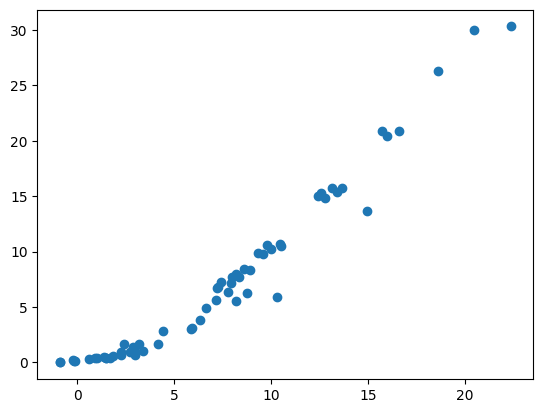

In [249]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
net=ElasticNet()
net.fit(x_train_s,y_train)
y_pred=net.predict(x_test_s)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print(f"{mse} {mae} {rmse}")
print(score)
arscore=1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(arscore)
plt.scatter(y_pred,y_test)

0.8367482640997471 0.6664382322793099 0.9147394514831789
0.9855548432347753
0.9826658118817303


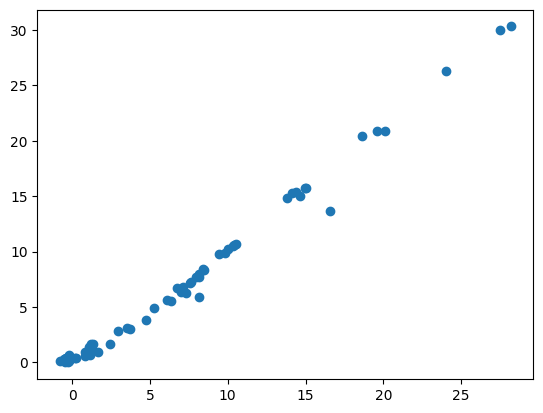

In [250]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
lasso1=LassoCV(cv=15)
lasso1.fit(x_train_s,y_train)
y_pred=lasso1.predict(x_test_s)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print(f"{mse} {mae} {rmse}")
print(score)
arscore=1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(arscore)
plt.scatter(y_pred,y_test)

In [251]:
print(lasso1.alphas_)
print(lasso1.alpha_)
print(lasso1.mse_path_)

[6.61683976 6.1708869  5.75498978 5.36712273 5.00539662 4.66804964
 4.35343872 4.06003152 3.78639898 3.53120836 3.29321674 3.07126495
 2.86427197 2.67122963 2.49119769 2.32329931 2.16671671 2.02068725
 1.8844997  1.75749072 1.63904173 1.5285758  1.42555491 1.32947728
 1.23987496 1.15631154 1.07838001 1.00570081 0.93791994 0.87470727
 0.81575493 0.76077578 0.70950204 0.66168398 0.61708869 0.57549898
 0.53671227 0.50053966 0.46680496 0.43534387 0.40600315 0.3786399
 0.35312084 0.32932167 0.3071265  0.2864272  0.26712296 0.24911977
 0.23232993 0.21667167 0.20206873 0.18844997 0.17574907 0.16390417
 0.15285758 0.14255549 0.13294773 0.1239875  0.11563115 0.107838
 0.10057008 0.09379199 0.08747073 0.08157549 0.07607758 0.0709502
 0.0661684  0.06170887 0.0575499  0.05367123 0.05005397 0.0466805
 0.04353439 0.04060032 0.03786399 0.03531208 0.03293217 0.03071265
 0.02864272 0.0267123  0.02491198 0.02323299 0.02166717 0.02020687
 0.018845   0.01757491 0.01639042 0.01528576 0.01425555 0.01329477


0.8555644831086964 0.6648951432882101 0.9249672875884295
0.9852300104923907
0.9822760125908688


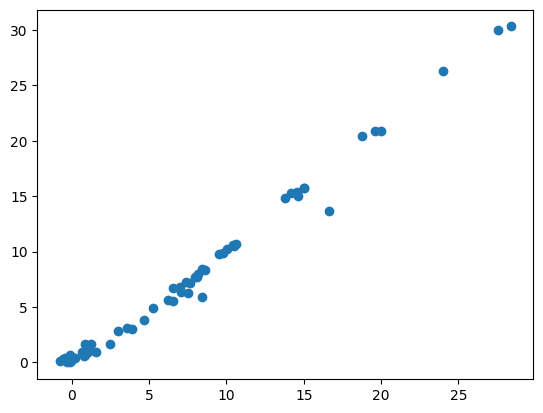

In [252]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
ridge1=RidgeCV(cv=15)
ridge1.fit(x_train_s,y_train)
y_pred=ridge1.predict(x_test_s)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print(f"{mse} {mae} {rmse}")
print(score)
arscore=1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(arscore)
plt.scatter(y_pred,y_test)

In [253]:
ridge1.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 15,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

0.897317679373319 0.6827011837475891 0.9472685360410315
0.9845092065285598
0.9814110478342717


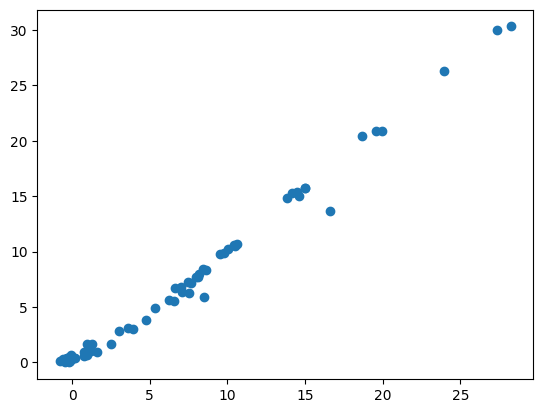

In [254]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
net1=ElasticNetCV()
net1.fit(x_train_s,y_train)
y_pred=net1.predict(x_test_s)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print(f"{mse} {mae} {rmse}")
print(score)
arscore=1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(arscore)
plt.scatter(y_pred,y_test)

In [255]:
print(net1.alphas_)
print(net1.alpha_)
print(net1.mse_path_)

[13.23367951 12.3417738  11.50997956 10.73424546 10.01079324  9.33609928
  8.70687743  8.12006304  7.57279796  7.06241673  6.58643348  6.1425299
  5.72854395  5.34245926  4.98239538  4.64659861  4.33343342  4.04137451
  3.76899939  3.51498145  3.27808346  3.05715161  2.85110982  2.65895456
  2.47974992  2.31262308  2.15676002  2.01140162  1.87583988  1.74941455
  1.63150986  1.52155156  1.41900408  1.32336795  1.23417738  1.15099796
  1.07342455  1.00107932  0.93360993  0.87068774  0.8120063   0.7572798
  0.70624167  0.65864335  0.61425299  0.57285439  0.53424593  0.49823954
  0.46465986  0.43334334  0.40413745  0.37689994  0.35149814  0.32780835
  0.30571516  0.28511098  0.26589546  0.24797499  0.23126231  0.215676
  0.20114016  0.18758399  0.17494145  0.16315099  0.15215516  0.14190041
  0.1323368   0.12341774  0.1150998   0.10734245  0.10010793  0.09336099
  0.08706877  0.08120063  0.07572798  0.07062417  0.06586433  0.0614253
  0.05728544  0.05342459  0.04982395  0.04646599  0.0433

## as ridge having highest r2 score so we will consider this as our model

In [256]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('ridge.pkl', 'wb') as f:
    pickle.dump(ridge, f)
